In [10]:
# PROJECT - COVID 19 TREND ANALYSIS

# Given the data about covid 19 patients write code to visualize the impact and analyze the trend of the rate of infection and recovery as well as make predictions.
# The predictions will be made about the number of cases expected in a week in future based on the current trends

# GUIDELINES:

# Use pandas to accomodate data from multiple data file
# Use plotly (visualization library) to create interactive visualizations
# Use Facebooks prophet library to make time series models
# Visualize the prediction by combining these technologies

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
data=pd.read_csv('/content/covid_19_clean_complete (1) (1).csv')

In [13]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [15]:
data.shape

(49068, 10)

In [16]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [18]:
data.rename(columns={'Date':'date',
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Confirmed':'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered',
                     'Active':'active'},inplace=True)

In [19]:
data.tail()

,state,country,Lat,Long,date,confirmed,deaths,recovered,active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [20]:
# Cases on the last day
top=data[data['date']==data['date'].max()]

In [21]:
top

,state,country,Lat,Long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [22]:
w=top.groupby('country')['confirmed','recovered','active','deaths'].sum().reset_index()

# summarizing the statistics for covid19 of each country by grouping the data, selecting specific columns
# summing up the values for each group, and resetting the index.
# the conclusion will be a dataframe having columns country,confirmed,deaths,recovered,active with aggregated values for each country

<ipython-input-22-ad85dcf3804b>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [23]:
w

,country,confirmed,recovered,active,deaths
0,Afghanistan,36263,25198,9796,1269
1,Albania,4880,2745,1991,144
2,Algeria,27973,18837,7973,1163
3,Andorra,907,803,52,52
4,Angola,950,242,667,41
...,...,...,...,...,...
182,West Bank and Gaza,10621,3752,6791,78
183,Western Sahara,10,8,1,1
184,Yemen,1691,833,375,483
185,Zambia,4552,2815,1597,140


from matplotlib import pyplot as plt
w['confirmed'].plot(kind='hist', bins=20, title='confirmed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
w['recovered'].plot(kind='hist', bins=20, title='recovered')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
w['active'].plot(kind='hist', bins=20, title='active')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
w['deaths'].plot(kind='hist', bins=20, title='deaths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
w.plot(kind='scatter', x='confirmed', y='recovered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
w.plot(kind='scatter', x='recovered', y='active', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
w.plot(kind='scatter', x='active', y='deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
w['confirmed'].plot(kind='line', figsize=(8, 4), title='confirmed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
w['recovered'].plot(kind='line', figsize=(8, 4), title='recovered')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
w['active'].plot(kind='line', figsize=(8, 4), title='active')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
w['deaths'].plot(kind='line', figsize=(8, 4), title='deaths')
plt.gca().spines[['top', 'right']].set_visible(False)

In [24]:
fig=px.choropleth(w,locations='country',locationmode='country names',
                  color='deaths',hover_name='country',
                  range_color=[1,50000],color_continuous_scale='Peach',
                  title="Deaths cases country wise")

fig.show()

In [25]:
fig=px.choropleth(w,locations='country',locationmode='country names',
                  color='deaths',hover_name='country',
                  range_color=[1,50000],color_continuous_scale='Viridis',
                  title="Deaths cases country wise")

fig.show()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       14664 non-null  object 
 1   country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   date        49068 non-null  object 
 5   confirmed   49068 non-null  int64  
 6   deaths      49068 non-null  int64  
 7   recovered   49068 non-null  int64  
 8   active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [29]:
data['date']=pd.to_datetime(data['date'])
data['date']=data['date'].dt.date

# '.dt.date' is an accessor that helps to extract only the date part (YYYY-MM-DD) from each date time object

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       14664 non-null  object 
 1   country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   date        49068 non-null  object 
 5   confirmed   49068 non-null  int64  
 6   deaths      49068 non-null  int64  
 7   recovered   49068 non-null  int64  
 8   active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [32]:
data['date']

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
49063    2020-07-27
49064    2020-07-27
49065    2020-07-27
49066    2020-07-27
49067    2020-07-27
Name: date, Length: 49068, dtype: object

In [34]:
fig=px.choropleth(data,locations='country',locationmode='country names',
                  color='active',hover_name='country',
                  range_color=[1,50000],
                  animation_frame='date',color_continuous_scale='Peach',
                  title="Death cases country wise")

fig.show()

In [35]:
# the no.of confirmed deaths datewise

t_cases=data.groupby('date')['confirmed'].sum().reset_index()
t_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


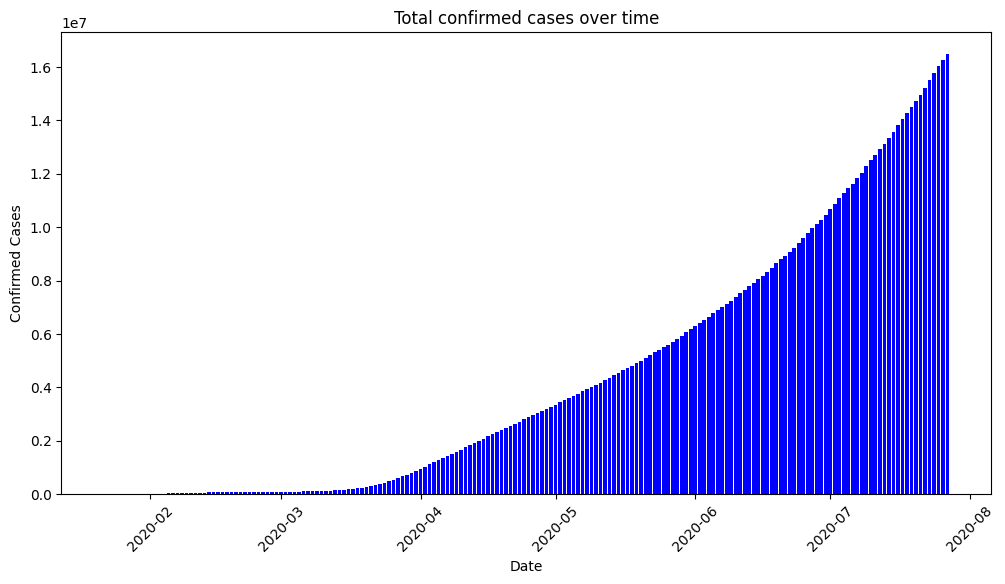

In [37]:
import matplotlib.pyplot as plt

t_cases=data.groupby('date')['confirmed'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.bar(t_cases['date'],t_cases['confirmed'],color='blue')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Total confirmed cases over time')
plt.xticks(rotation=45)
plt.show()

In [38]:
# top 20 countries with most cases

t_20_top=top.groupby('country')['active'].sum().reset_index().sort_values(by='active',ascending=False).head(20)

In [39]:
t_20_top.reset_index(inplace=True)

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000.]),
 [Text(0, 0.0, '0.0'),
  Text(0, 500000.0, '0.5'),
  Text(0, 1000000.0, '1.0'),
  Text(0, 1500000.0, '1.5'),
  Text(0, 2000000.0, '2.0'),
  Text(0, 2500000.0, '2.5'),
  Text(0, 3000000.0, '3.0')])

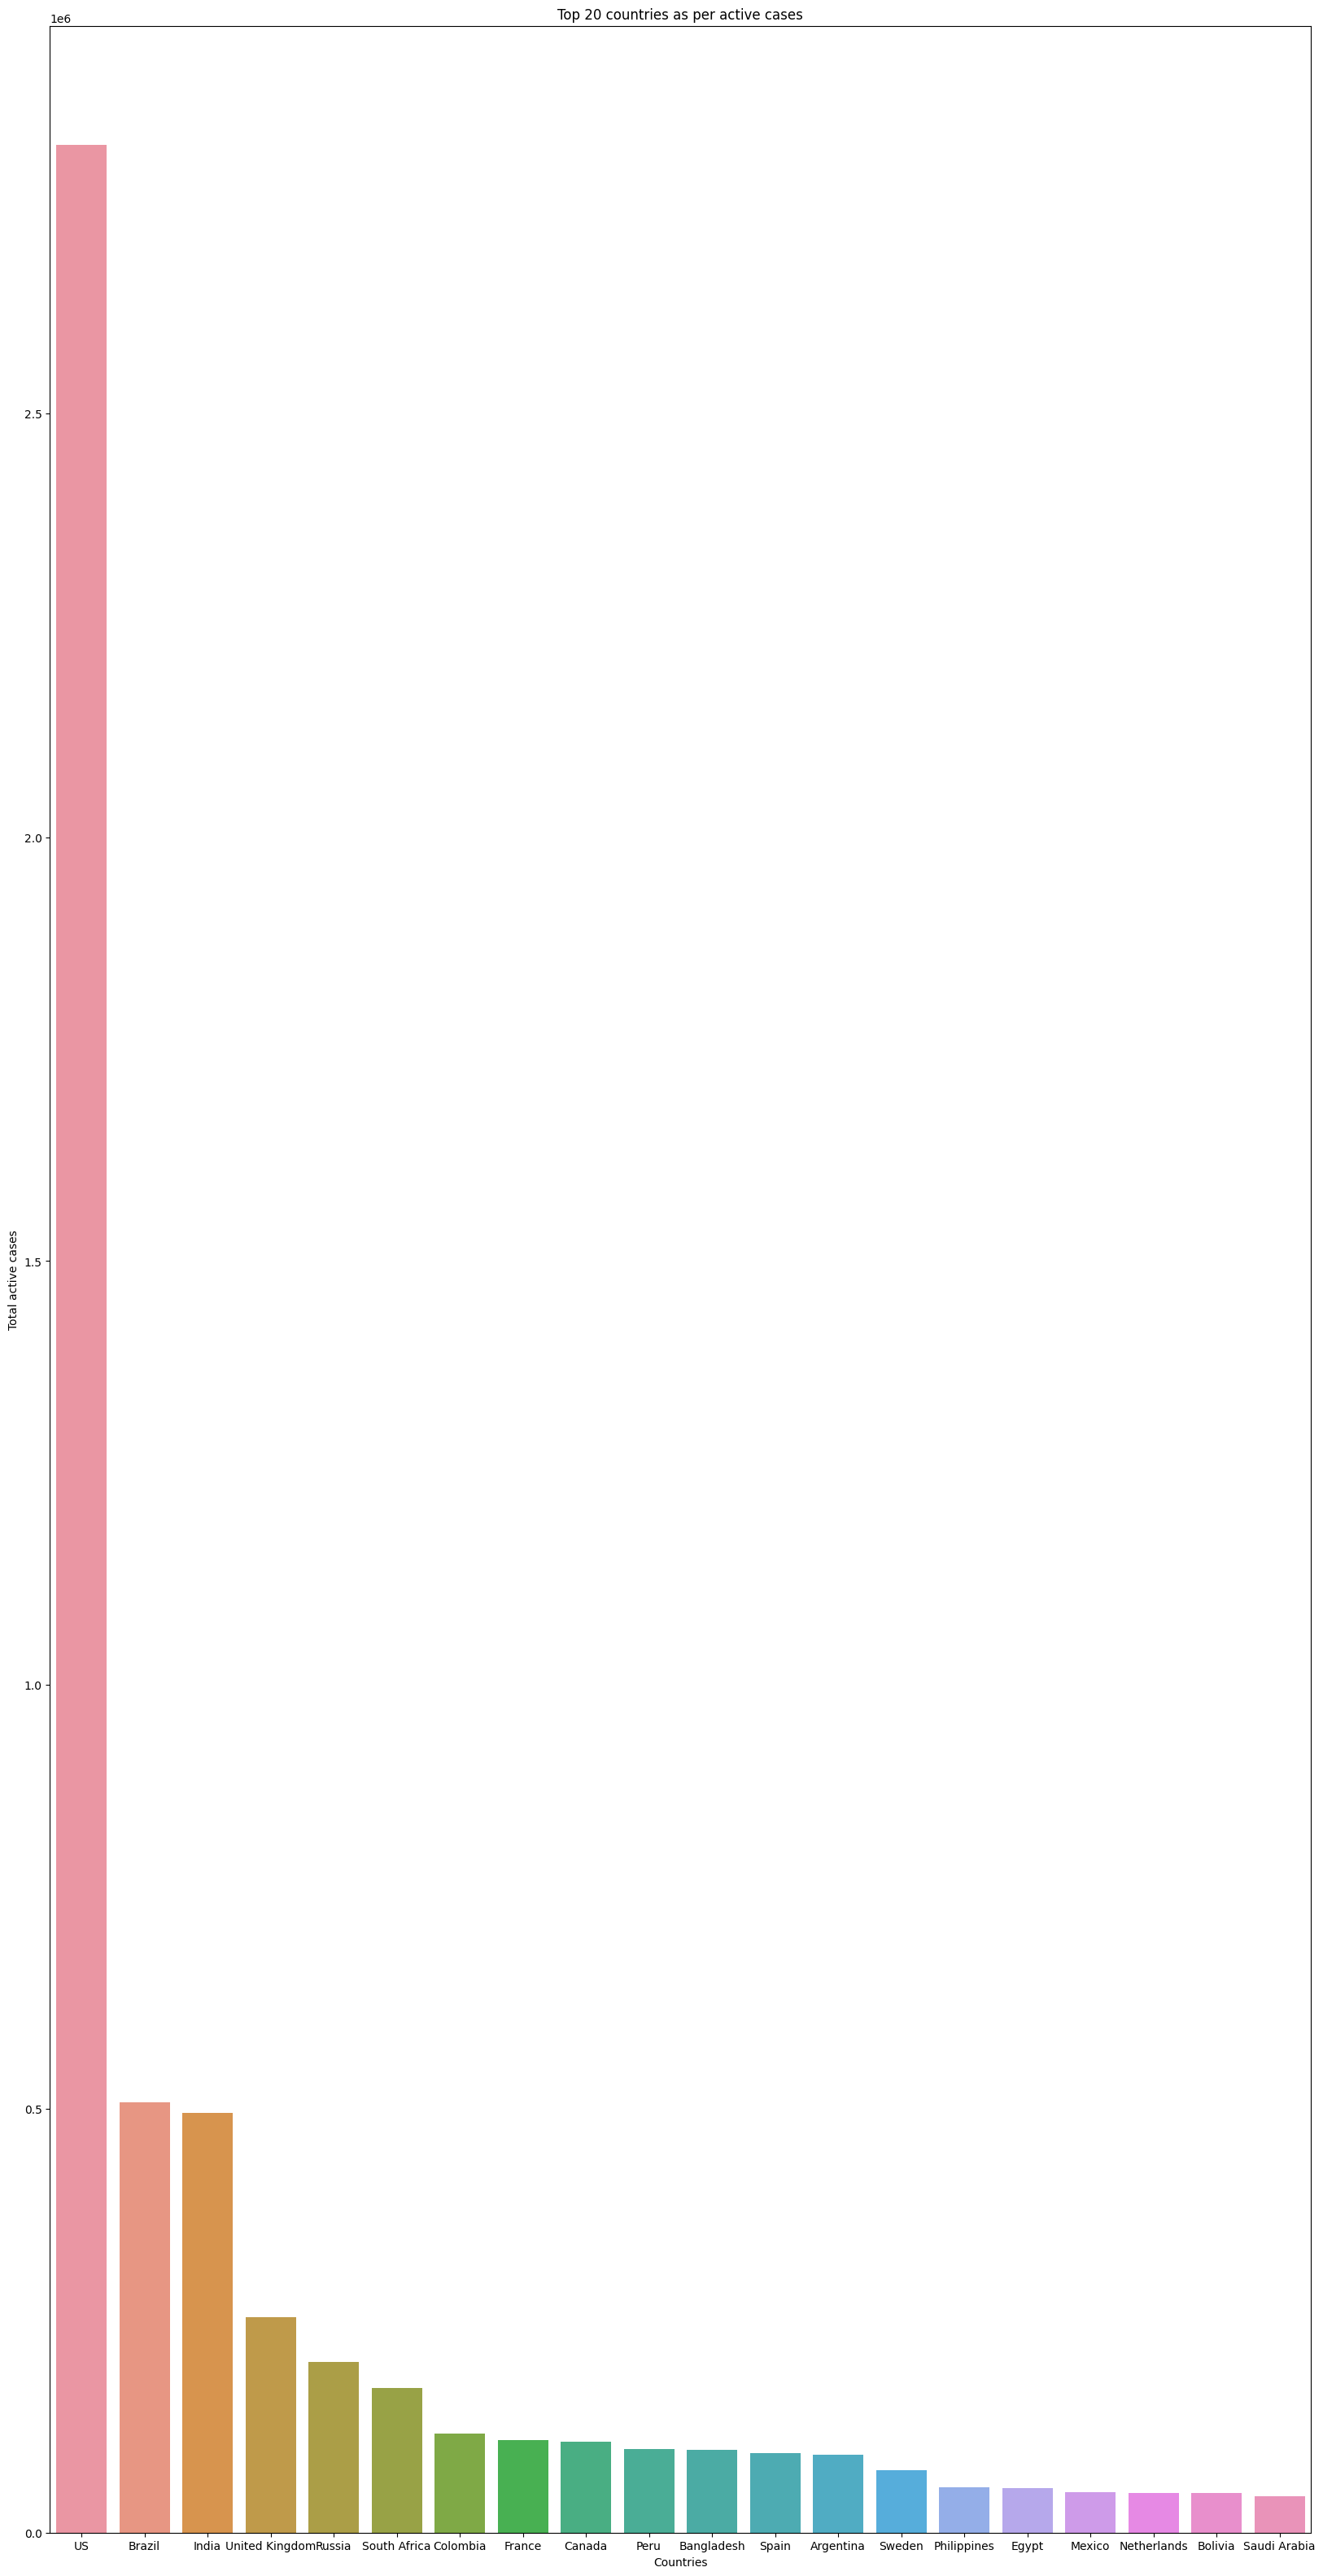

In [43]:
plt.figure(figsize=(20,40))
plt.title('Top 20 countries as per active cases')

b=sns.barplot(y=t_20_top.active,x=t_20_top.country)

b.set(ylabel="Total active cases",xlabel="Countries")

plt.xticks()
plt.yticks()


In [44]:
# FBProphet

# FaceBook Prophet
# It is an open-source tool for forecasting the time series data.
# It is used to model a data on the basis of combination of trends, seasonality and noise components.

In [45]:
# to find the confirmed, recovered and deaths count as per dates

confirmed=data.groupby('date').sum()['confirmed'].reset_index()
recovered=data.groupby('date').sum()['recovered'].reset_index()
deaths=data.groupby('date').sum()['deaths'].reset_index()

<ipython-input-45-87c52ab43731>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-45-87c52ab43731>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-45-87c52ab43731>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [46]:
confirmed.head()

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


from matplotlib import pyplot as plt
_df_28['confirmed'].plot(kind='hist', bins=20, title='confirmed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_29.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['confirmed']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'confirmed'}, axis=1)
              .sort_values('confirmed', ascending=True))
  xs = counted['confirmed']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('confirmed', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('confirmed')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_32['confirmed'].plot(kind='line', figsize=(8, 4), title='confirmed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='confirmed', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [47]:
recovered.head()

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [48]:
deaths.head()

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [49]:
from prophet import Prophet

In [51]:
confirmed.columns=['ds','y']
confirmed.tail(10)
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed.info()

# assigning the column names to 'ds' and 'y'
# 'ds' represents the date and 'y' represents the variable being measured


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [53]:
# creating model

model = Prophet(interval_width=0.95)

# 'interval_width' is a parameter that sets the width of the uncertainty intervals for the forecast.
#  it has been set to 0.95 meaning the model will generate the preddiction intervals that cover 95% of the forecast distribution.

In [54]:
model.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4c5ejpk/d708rnc0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4c5ejpk/l_ge2voi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49839', 'data', 'file=/tmp/tmpv4c5ejpk/d708rnc0.json', 'init=/tmp/tmpv4c5ejpk/l_ge2voi.json', 'output', 'file=/tmp/tmpv4c5ejpk/prophet_model8rth0p0l/prophet_model-20231203063624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:36:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:36:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [55]:
future=model.make_future_dataframe(periods=7,freq='D')
future

# .make_future_dataframe is a method provided from the Prophet library to generata dataframe on the basis of future predictions
# periods over here is the number of periods (in this case 7) into the future for which you want to generate the predictions
# freq=D: it is a paramater that sets the frequency over the time series, in this case it is set to D that indicated daily frequency

# so periods=7 will be predicting for next 7 dates from the last date entry as per freq ='D'


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [56]:
forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.726538e+05,1.388871e+05,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.680414e+05,1.497454e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.579003e+05,1.672946e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-1.473002e+05,1.767990e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-1.622737e+05,1.722704e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.658161e+07,1.690514e+07,1.672440e+07,1.676806e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.679568e+07,1.711541e+07,1.691580e+07,1.698516e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.699866e+07,1.734046e+07,1.710930e+07,1.720850e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.718129e+07,1.754836e+07,1.729602e+07,1.743182e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [57]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          195 non-null    datetime64[ns]
 1   trend                       195 non-null    float64       
 2   yhat_lower                  195 non-null    float64       
 3   yhat_upper                  195 non-null    float64       
 4   trend_lower                 195 non-null    float64       
 5   trend_upper                 195 non-null    float64       
 6   additive_terms              195 non-null    float64       
 7   additive_terms_lower        195 non-null    float64       
 8   additive_terms_upper        195 non-null    float64       
 9   weekly                      195 non-null    float64       
 10  weekly_lower                195 non-null    float64       
 11  weekly_upper                195 non-null    float64       

In [61]:
forecast[['yhat','yhat_lower','yhat_upper']]=forecast[['yhat','yhat_lower','yhat_upper']].astype(int)

In [62]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
185,2020-07-25,15738824,15896217,15896217
186,2020-07-26,15936363,16109703,16109703
187,2020-07-27,16130952,16291046,16291046
188,2020-07-28,16320199,16482294,16482294
189,2020-07-29,16529972,16688771,16688771
190,2020-07-30,16743908,16905140,16905140
191,2020-07-31,16959097,17115410,17115410
192,2020-08-01,17166757,17340455,17340455
193,2020-08-02,17364296,17548364,17548364
194,2020-08-03,17558885,17746353,17746353


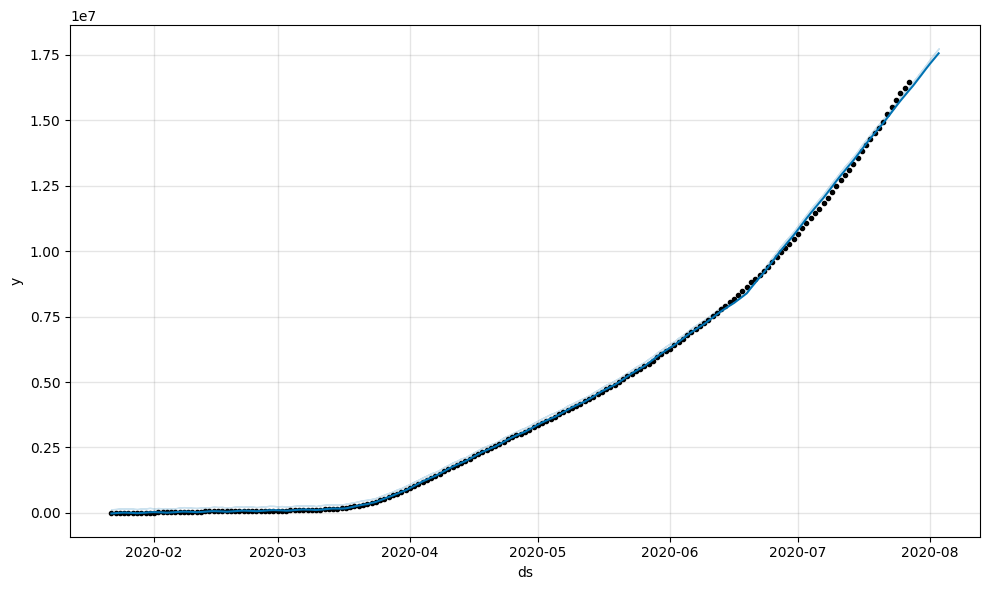

In [63]:
confirmed_forecast_plot=model.plot(forecast)

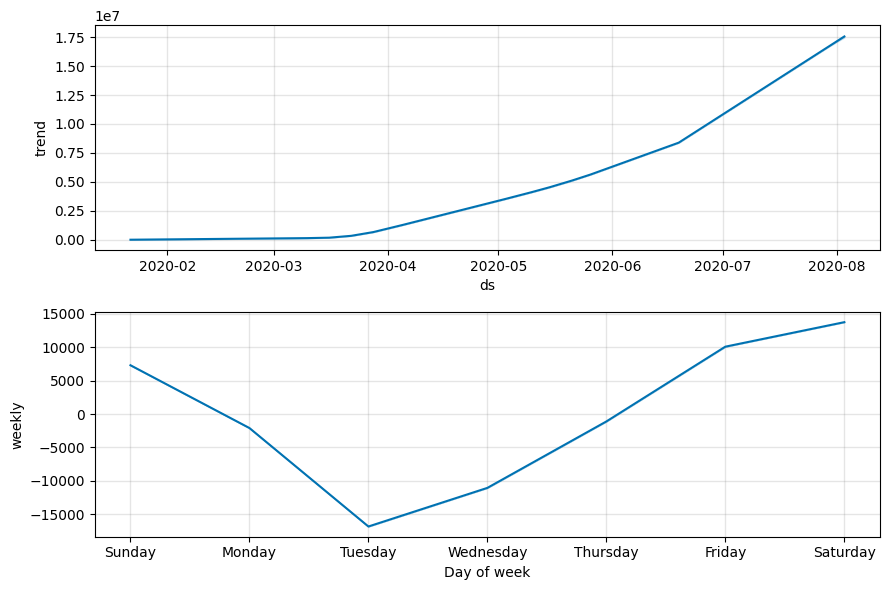

In [64]:
confirmed_forecast_plot=model.plot_components(forecast)